In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_stock = pd.read_csv(
    'C:\\Users\ADMIN\AppData\Roaming\MetaQuotes\Terminal\\2506E8E7E4116548D478CE2C3598FAB1\MQL5\Files\\USDIRR-D1.prn')
df_stock

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20080101,0,9430.0,9430.0,9430.0,9430.0,1
1,20080102,0,9430.0,9430.0,9430.0,9430.0,1
2,20080105,0,9430.0,9430.0,9430.0,9430.0,1
3,20080106,0,9430.0,9430.0,9430.0,9430.0,1
4,20080108,0,9430.0,9430.0,9430.0,9430.0,1
...,...,...,...,...,...,...,...
4421,20230217,0,468680.0,473000.0,466000.0,472350.0,197
4422,20230218,0,472160.0,484990.0,471000.0,481140.0,109
4423,20230219,0,481540.0,485310.0,479950.0,480030.0,76
4424,20230220,0,480030.0,497500.0,479990.0,496340.0,122


In [3]:
df = df_stock['<CLOSE>']
df

0         9430.0
1         9430.0
2         9430.0
3         9430.0
4         9430.0
          ...   
4421    472350.0
4422    481140.0
4423    480030.0
4424    496340.0
4425    495600.0
Name: <CLOSE>, Length: 4426, dtype: float64

In [4]:
x = df.values
x

array([  9430.,   9430.,   9430., ..., 480030., 496340., 495600.])

In [5]:
max = np.max(x)
x = x / np.max(x)
x

array([0.01899907, 0.01899907, 0.01899907, ..., 0.96713946, 1.        ,
       0.99850909])

In [6]:
train_size_split = 0.85
train_size = int(np.round(train_size_split * len(x)))
data_train = x[:train_size]
data_test = x[train_size:]

In [7]:
data_train

array([0.01899907, 0.01899907, 0.01899907, ..., 0.45537333, 0.4552726 ,
       0.45839545])

In [8]:
look_back = 30

In [9]:
def preprocess(data, step: int):
    app_x = []
    app_y = []
    for i in range(len(data)):
        if i <= (len(data) - (step + 1)):
            app_x.append(data[i:i + step])
            app_y.append(data[i + step])
    return np.array(app_x), np.array(app_y)

In [10]:
x_train, y_train = preprocess(data_train, look_back)

In [11]:
x_train

array([[0.01899907, 0.01899907, 0.01899907, ..., 0.01893662, 0.01893662,
        0.01893662],
       [0.01899907, 0.01899907, 0.01899907, ..., 0.01893662, 0.01893662,
        0.01893662],
       [0.01899907, 0.01899907, 0.01899907, ..., 0.01893662, 0.01893662,
        0.01893662],
       ...,
       [0.41300318, 0.41910787, 0.42918161, ..., 0.4572672 , 0.45235121,
        0.45235121],
       [0.41910787, 0.42918161, 0.4372406 , ..., 0.45235121, 0.45235121,
        0.45537333],
       [0.42918161, 0.4372406 , 0.44120965, ..., 0.45235121, 0.45537333,
        0.4552726 ]])

In [12]:
y_train

array([0.01893662, 0.01893662, 0.01893662, ..., 0.45537333, 0.4552726 ,
       0.45839545])

In [13]:
x_test, y_test = preprocess(data_test, look_back)

In [14]:
x_train = x_train.reshape(-1, look_back, 1)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(6, input_shape=(look_back, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x_train, y_train, batch_size=1, epochs=14)

Epoch 1/20
3732/3732 [==============================] - 29s 7ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2/20
3732/3732 [==============================] - 28s 7ms/step - loss: 7.0404e-05 - mean_squared_error: 7.0404e-05
Epoch 3/20
3732/3732 [==============================] - 27s 7ms/step - loss: 4.7486e-05 - mean_squared_error: 4.7486e-05
Epoch 4/20
3732/3732 [==============================] - 28s 7ms/step - loss: 3.8364e-05 - mean_squared_error: 3.8364e-05
Epoch 5/20
3732/3732 [==============================] - 27s 7ms/step - loss: 3.3346e-05 - mean_squared_error: 3.3346e-05
Epoch 6/20
3732/3732 [==============================] - 27s 7ms/step - loss: 2.8898e-05 - mean_squared_error: 2.8898e-05
Epoch 7/20
3732/3732 [==============================] - 27s 7ms/step - loss: 2.5787e-05 - mean_squared_error: 2.5787e-05
Epoch 8/20
3732/3732 [==============================] - 27s 7ms/step - loss: 2.5210e-05 - mean_squared_error: 2.5210e-05
Epoch 9/20
3732/3732 [==================

In [16]:
pred = model.predict(x_test.reshape(-1, look_back, 1))

20/20 [==============================] - 1s 4ms/step


In [17]:
pred

array([[0.5992315 ],
       [0.604656  ],
       [0.6071078 ],
       [0.58637285],
       [0.52012837],
       [0.5630858 ],
       [0.56261706],
       [0.55411446],
       [0.5348396 ],
       [0.54455304],
       [0.53315353],
       [0.5335513 ],
       [0.5143645 ],
       [0.5255592 ],
       [0.54441077],
       [0.5546287 ],
       [0.49762025],
       [0.472364  ],
       [0.4553048 ],
       [0.48423284],
       [0.5255255 ],
       [0.514213  ],
       [0.51514274],
       [0.51331556],
       [0.4980976 ],
       [0.49933094],
       [0.4984925 ],
       [0.49256182],
       [0.49366495],
       [0.5002561 ],
       [0.48791626],
       [0.49296364],
       [0.48095712],
       [0.48358798],
       [0.47636107],
       [0.47345763],
       [0.48326457],
       [0.49389803],
       [0.49173158],
       [0.48939103],
       [0.4915711 ],
       [0.49254832],
       [0.49230018],
       [0.49235478],
       [0.5004552 ],
       [0.5006165 ],
       [0.5008316 ],
       [0.499

In [18]:
y_test

array([0.63859451, 0.64169722, 0.62255712, 0.55498247, 0.58034815,
       0.59183221, 0.58425676, 0.56382722, 0.56880364, 0.56100657,
       0.55909256, 0.54140307, 0.54807189, 0.56896482, 0.58296732,
       0.53098682, 0.49355281, 0.47346577, 0.49971794, 0.54605714,
       0.54394165, 0.54106056, 0.53888464, 0.52395535, 0.52188016,
       0.52175928, 0.51623887, 0.51617843, 0.52290768, 0.51267276,
       0.5148084 , 0.50463392, 0.50481525, 0.498771  , 0.49476166,
       0.50382802, 0.51619857, 0.51617843, 0.51307571, 0.51445582,
       0.51583592, 0.51575533, 0.51567474, 0.52335093, 0.52514405,
       0.52514405, 0.52373373, 0.51986541, 0.51783052, 0.52087279,
       0.51968409, 0.51984527, 0.51374058, 0.51172583, 0.51271306,
       0.51426442, 0.51938188, 0.52105412, 0.51805214, 0.51857598,
       0.51865657, 0.51785067, 0.51772978, 0.51781037, 0.51607769,
       0.51507031, 0.51914011, 0.52190031, 0.52077205, 0.51484869,
       0.50102752, 0.5007656 , 0.5007656 , 0.50064472, 0.49369

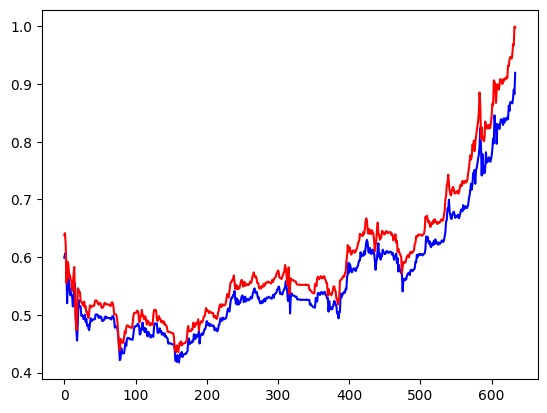

In [19]:
plt.plot(pred, c='blue')
plt.plot(y_test, c='red')

In [20]:
x_true, y_true = preprocess(x, look_back)

In [21]:
prediction = model.predict(x_true.reshape(-1, look_back, 1))

138/138 [==============================] - 0s 3ms/step


In [22]:
x

array([0.01899907, 0.01899907, 0.01899907, ..., 0.96713946, 1.        ,
       0.99850909])

In [23]:
prediction

array([[0.02188414],
       [0.02188412],
       [0.0218841 ],
       ...,
       [0.8904271 ],
       [0.88320357],
       [0.9195971 ]], dtype=float32)

In [24]:
p = np.array([np.nan] * len(x))
for i in range(look_back, len(x)):
    p[i] = prediction[i - look_back]

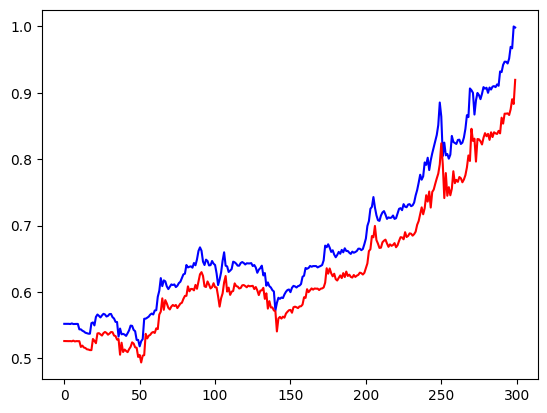

In [25]:
plt.plot(x[-300:], c='blue')
plt.plot(p[-300:], c='red')

In [26]:
prediction[-1] * max

array([456432.8], dtype=float32)

In [27]:
x[-1] * max

495600.0

In [28]:
y_true

array([0.01893662, 0.01893662, 0.01893662, ..., 0.96713946, 1.        ,
       0.99850909])

In [29]:
prediction

array([[0.02188414],
       [0.02188412],
       [0.0218841 ],
       ...,
       [0.8904271 ],
       [0.88320357],
       [0.9195971 ]], dtype=float32)

In [30]:
distance = np.array([y_true[i] - prediction[i] for i in range(len(y_true))])
distance

array([[-0.00294752],
       [-0.0029475 ],
       [-0.00294749],
       ...,
       [ 0.07671237],
       [ 0.11679643],
       [ 0.07891202]], dtype=float32)

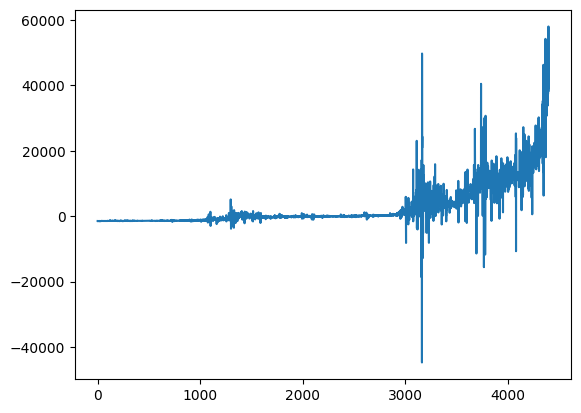

In [31]:
plt.plot(distance * max)

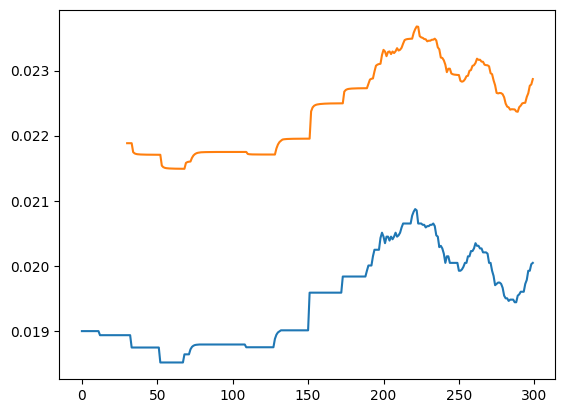

In [32]:
plt.plot(x[:300])
plt.plot(p[:300])

In [33]:
x

array([0.01899907, 0.01899907, 0.01899907, ..., 0.96713946, 1.        ,
       0.99850909])

In [37]:
model.predict(x[-30:].reshape(-1, look_back, 1)) * max

1/1 [==============================] - 0s 29ms/step


array([[449592.62]], dtype=float32)

In [44]:
x_c = list(x)
x_c

[0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.018999073215940687,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.01893661602933473,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747229721561832,
 0.018747

In [45]:
x_c[-30:]

[0.9040174074223315,
 0.8999879115122699,
 0.8673489946407704,
 0.8887254704436475,
 0.8998871741145182,
 0.8965829874682677,
 0.8905185961236249,
 0.8985775879437482,
 0.9086513277189023,
 0.9062537776524157,
 0.9077446911391385,
 0.900068501430471,
 0.9080267558528428,
 0.9050046339202966,
 0.909416931941814,
 0.9101825361647258,
 0.9086311802393521,
 0.9127815610267156,
 0.9106660756739332,
 0.932223878792763,
 0.9312165048152476,
 0.9421968811701656,
 0.946931538864488,
 0.946931538864488,
 0.9442720715638474,
 0.9516661965588105,
 0.9693758310835314,
 0.9671394608534473,
 1.0,
 0.9985090865132772]

In [53]:
p=model.predict(np.array(x_c[-30:]).reshape(-1,look_back,1))
p[0][0]

1/1 [==============================] - 0s 36ms/step


0.90581584

In [54]:
for i in range(10):
    arr=np.array(x_c[-30:]).reshape(-1,look_back,1)
    pr=model.predict(arr)
    x_c.append(pr[0][0])

1/1 [==============================] - 0s 34ms/step


In [57]:
x_c=np.array(x_c)
x_c

array([0.01899907, 0.01899907, 0.01899907, ..., 0.57004803, 0.54424286,
       0.52071542])

In [60]:
x

array([0.01899907, 0.01899907, 0.01899907, ..., 0.96713946, 1.        ,
       0.99850909])

In [70]:
a=np.array([np.nan]*110)
for i in range(10,110):
    a[i]=x_c[-110:][i]

In [71]:
a

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.71523552, 0.71986944, 0.72188419, 0.71664585, 0.71019865,
       0.71241488, 0.71160898, 0.7122134 , 0.71523552, 0.71019865,
       0.71120603, 0.71825765, 0.72530926, 0.72631664, 0.72329452,
       0.73236088, 0.72853286, 0.72772696, 0.73175646, 0.73236088,
       0.72933876, 0.73054761, 0.73477858, 0.74545674, 0.75351574,
       0.76459685, 0.77668534, 0.76923077, 0.77426764, 0.79522102,
       0.79159447, 0.80227264, 0.78373695, 0.79824314, 0.8089213 ,
       0.81798767, 0.82765846, 0.83652335, 0.85143249, 0.88548173,
       0.86432687, 0.80489181, 0.82503929, 0.80589918, 0.80791393,
       0.80086231, 0.80690656, 0.83511303, 0.82604666, 0.82443486,
       0.82302454, 0.82906878, 0.82947173, 0.82302454, 0.82503929,
       0.83269533, 0.84579119, 0.86634162, 0.86352097, 0.90663658,
       0.90401741, 0.89998791, 0.86734899, 0.88872547, 0.89988

In [72]:
x[-100:]

array([0.68058186, 0.69952049, 0.70677358, 0.72530926, 0.72833139,
       0.74303905, 0.72732401, 0.71563847, 0.70818391, 0.70717653,
       0.71523552, 0.71986944, 0.72188419, 0.71664585, 0.71019865,
       0.71241488, 0.71160898, 0.7122134 , 0.71523552, 0.71019865,
       0.71120603, 0.71825765, 0.72530926, 0.72631664, 0.72329452,
       0.73236088, 0.72853286, 0.72772696, 0.73175646, 0.73236088,
       0.72933876, 0.73054761, 0.73477858, 0.74545674, 0.75351574,
       0.76459685, 0.77668534, 0.76923077, 0.77426764, 0.79522102,
       0.79159447, 0.80227264, 0.78373695, 0.79824314, 0.8089213 ,
       0.81798767, 0.82765846, 0.83652335, 0.85143249, 0.88548173,
       0.86432687, 0.80489181, 0.82503929, 0.80589918, 0.80791393,
       0.80086231, 0.80690656, 0.83511303, 0.82604666, 0.82443486,
       0.82302454, 0.82906878, 0.82947173, 0.82302454, 0.82503929,
       0.83269533, 0.84579119, 0.86634162, 0.86352097, 0.90663658,
       0.90401741, 0.89998791, 0.86734899, 0.88872547, 0.89988

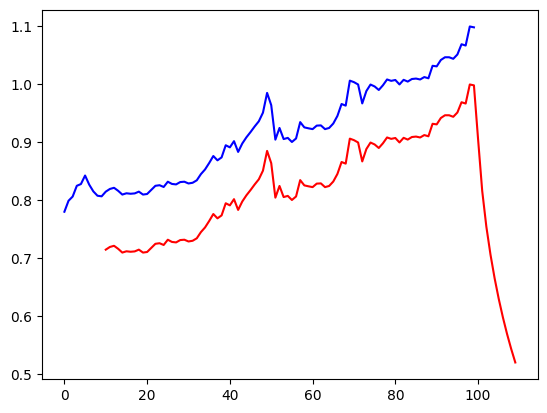

In [76]:
plt.plot(x[-100:]+0.1,c='blue')
#plt.plot(x_c,c='green')
plt.plot(a[-110:],c='red')